 # Evaluation of load disaggregation algorithms using NILMTK

## INTRODUCTION

In recent years, there has been a lot of interest in non-intrusive load monitoring and load disaggregation of building energy data. One of the emerging efforts in this space is the development of the Non-Intrusive Load Monitoring Toolkit (NILMTK), an open source toolkit designed specifically for the application of meter energy data disaggregation [1]. There have been a number of research studies on this topic which have produced publicly available datasets of meter data. NILMTK is a step towards a development of a common platform to load, process, apply algorithms and evaluate the results on the various available public datasets.

For our project, we first show the NILMTK process pipeline on two datasets:

REDD: Reference Energy Disaggregation Dataset, the first publicly available dataset collected specifically for NILM. 

IAWE: Indian data for Ambient Water and Electricity Sensing contains both aggregate and sub-metered power data from a single house.

NILMTK has an inbuilt data converter framework which allows users to convert NILM datasets to binary format using Hierarchical Data Format (HD5). This is an efficient way of storing large volumes of data. The data converter outputs a HDF5 file which contains both the time series data from each meter as well as all relevant metadata.

An important feature on NILMTK is that once the data is imported, the labels are standardized acrooss different datasets. This is advantageous because different dataset use different labels for the same appliance.

**Code for data conversion to HD5 format:**

REDD data is gathered across two frequencies 1 Hz and 15 kHz 

In [61]:
import nilmtk
import sip

The following code is for converting REDD data to hd5 format. 

In [77]:
#from nilmtk.dataset_converters import convert_redd
#convert_redd('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project\low_freq', 'C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')

NILMTK doesn't load the data by default to conserve memory. The following piece of code is for loading the data.

In [62]:
from nilmtk.utils import print_dict
from nilmtk import DataSet
redd = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')

This REDD data consists of 6 houses. These are represented here by object 'building'

In [63]:
print_dict(redd.buildings)

In [64]:
print_dict(redd.buildings[1].metadata)

The 'elec' object is created to represent the electricty consumption of the 'building' object. Here, low frequency data (1Hz) is being imported and displayed.

In [65]:
redd = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')
elec = redd.buildings[1].elec
print(elec)

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [66]:
from __future__ import print_function, division
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore

In [67]:
train = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')
test = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')

A plot for the training data is given below.

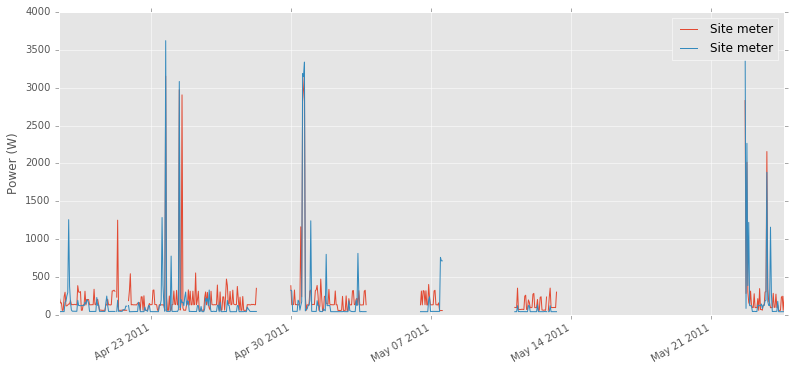

In [68]:
building = 1
train.buildings[building].elec.mains().plot()

The following plot is for the training data of iawe. (building 1)

<img src = "iawe_training.png">

<img src = "C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/iawe_training.png">

In [69]:
train.set_window(end="30-4-2011")
test.set_window(start="30-4-2011")
train_elec = train.buildings[building].elec
test_elec = test.buildings[building].elec
train_elec.mains()
test_elec.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

Top five power conusming devices are identified and used for training disaggregarion algorithms. The sample period is downsized to 60 seconds.

In [70]:
top_5_train_elec = train_elec.submeters().select_top_k(k=5)

15/16 MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters=
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

## Training and Disaggregation of data

NILMTK currently supports execution of two disaggregation algorithms:
1. Comninatorial optimization
2. FHMM(Factorial Harmonic Markov Model)

In [53]:
from nilmtk.disaggregate import fhmm_exact
from nilmtk import TimeFrame, MeterGroup, HDFDataStore
import time
start = time.time()
fhmm = fhmm_exact.FHMM()
fhmm.train(top_5_train_elec, sample_period=60)
end = time.time()
print("Runtime =", end-start, "seconds.")

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])'
Runtime = 20.0430002213 seconds.


The following code makes a file for the disaggregated data.

In [79]:
#disag_filename = ('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/redd-disag-fhmm.h5')
#output = HDFDataStore(disag_filename, 'w')
#fhmm.disaggregate(test_elec.mains(), output, sample_period=60)
#output.close()

The back-end code for the following piece has a bug, which we're trying to fix.

In [80]:
#disag_fhmm = DataSet(disag_filename)
#disag_fhmm_elec = disag_fhmm.buildings[building].elec

The following code is supposed to plot the f-score for FHMM for the top 5 energy consiming appliances.
F-score is the harmonic mean of precision and recall.
Precision being the fraction of time slices in which an appliance was correctly predicted to be on that it was actually off.
Recall is the fraction of time slices in which the appliance was correctly predicted to be on that it was actually on. 

In [82]:
#from nilmtk.metrics import f1_score
#f1_fhmm = f1_score(disag_fhmm_elec, test_elec)
#f1_fhmm.index = disag_fhmm_elec.get_labels(f1_fhmm.index)
#f1_fhmm.plot(kind='barv')
#plt.ylabel('appliance');
#plt.xlabel('f-score');
#plt.title("FHMM");

# FUTURE WORK

We plan to carry out one or more of the following tasks, depending on feedback and time constraints:

1. To develop and execute the NILMTK process pipeline on PLAID(Plug-Load Appliance Identification dataset). Currently NILMTK does not have a data converter package to work on PLAID.

2. To incorporate a new classification algorithm(naive bayes/SVM/decision tree/adaptive boosting) into NILMTK with the help of scikit learn and charactorize the performance based on various accuracy metrics such as Error in total energy,Normalised error, Confusion matrix, True/False positive rate, F-score or Hamming loss.

3. To apply a disaggregation algorithm to identify a particular chosen appliance/device signature, and carry out hypothesis testing to use it as an accuracy metric for comparison across various datasets.


